In [1]:
import pandas as pd

# Links

In [6]:
link_crsp_ibes = pd.read_csv('raw_data_2/CRSP_IBES_link_table.csv')
link_crsp_ibes.head()

,TICKER,PERMNO,NCUSIP,sdate,edate,SCORE
0,00VP,15703.0,32008D10,19NOV2015,30DEC2016,1
1,01AB,16342.0,G0084W10,17NOV2016,30DEC2016,1
2,01AF,16347.0,01387210,17NOV2016,30DEC2016,1
3,AA,24643.0,02224910,15JAN1976,03JAN1999,1
4,AA,24643.0,01381710,14JAN1999,05OCT2016,1


In [7]:
link_crsp_comp = pd.read_csv('raw_data_2/Compustat_CRSP_link_table.csv')
link_crsp_comp.head()

,gvkey,conm,tic,cusip,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT
0,1010,ACF INDUSTRIES HOLDING CORP,4165A,00099V004,C,00X,LU,10006,22156,19500501,19620130
1,1010,ACF INDUSTRIES HOLDING CORP,4165A,00099V004,P,01,LU,10006,22156,19620131,19840628
2,1013,ADC TELECOMMUNICATIONS INC,ADCT,000886309,P,01,LU,50906,2902,19790316,20101231
3,1040,AMF INC,AMF.2,001688100,P,01,LU,15763,22631,19620131,19851031
4,1040,AMF INC,AMF.2,001688100,C,00X,LU,15763,22631,19500101,19620130


# Compustat

In [4]:
cons = pd.read_csv('raw_data_2/cons_70_17.csv')
cons.head()

,gvkey,gvkeyx,from,thru,conm,tic,co_conm,co_tic,co_cusip
0,1078,3,19640331,NaN,S&P 500 Comp-Ltd,I0003,ABBOTT LABORATORIES,ABT,002824100
1,1300,3,19640331,NaN,S&P 500 Comp-Ltd,I0003,HONEYWELL INTERNATIONAL INC,HON,438516106
2,1440,3,19640331,NaN,S&P 500 Comp-Ltd,I0003,AMERICAN ELECTRIC POWER CO,AEP,025537101
3,2285,3,19640331,NaN,S&P 500 Comp-Ltd,I0003,BOEING CO,BA,097023105
4,2403,3,19640331,NaN,S&P 500 Comp-Ltd,I0003,BRISTOL-MYERS SQUIBB CO,BMY,110122108


# IBES

In [124]:
ibes_actuals = pd.read_csv('raw_data_2/actuals.csv')
ibes_actuals.head()

,TICKER,CUSIP,OFTIC,CNAME,PENDS,MEASURE,PDICITY,ANNDATS,ANNTIMS,ACTDATS,ACTTIMS,VALUE,CURR_ACT
0,A,02742010,A,AMERN MEDIC BLDG,19881231,EPS,QTR,19890401,0:00:00,19890401,0:00:00,0.07,USD
1,A,02742010,A,AMERN MEDIC BLDG,19890331,EPS,QTR,19890517,0:00:00,19890517,0:00:00,0.00,USD
2,A,02742010,A,AMERN MEDIC BLDG,19890630,EPS,QTR,19890816,0:00:00,19890816,0:00:00,-0.09,USD
3,A,02742010,A,AMERN MEDIC BLDG,19890930,EPS,QTR,19891114,0:00:00,19891114,0:00:00,0.00,USD
4,A,02742010,A,AMERN MEDIC BLDG,19891231,EPS,QTR,19900418,0:00:00,19900418,0:00:00,0.00,USD


In [75]:
ibes_estimates = pd.read_csv('raw_data_2/estimates.csv')
ibes_estimates.head()

,TICKER,CUSIP,OFTIC,CNAME,ACTDATS,ANALYS,FPI,MEASURE,VALUE,FPEDATS
0,AA,02224910,AA,ALCOA,19980709,478,6,EPS,0.675,19980930
1,AA,01381710,AA,ALCOA INC.,19990409,297,6,EPS,0.750,19990630
2,AA,01381710,AA,ALCOA INC.,19991011,56581,6,EPS,1.410,19991231
3,AA,01381710,AA,ALCOA INC.,20010212,610,6,EPS,1.320,20010331
4,AA,01381710,AA,ALCOA INC.,20011031,40316,6,EPS,1.050,20011231


# CRSP

In [14]:
comp = pd.read_csv('raw_data_2/cons_70_17.csv')
comp.head()

,gvkey,gvkeyx,from,thru,conm,tic,co_conm,co_tic,co_cusip
0,1078,3,19640331,NaN,S&P 500 Comp-Ltd,I0003,ABBOTT LABORATORIES,ABT,002824100
1,1300,3,19640331,NaN,S&P 500 Comp-Ltd,I0003,HONEYWELL INTERNATIONAL INC,HON,438516106
2,1440,3,19640331,NaN,S&P 500 Comp-Ltd,I0003,AMERICAN ELECTRIC POWER CO,AEP,025537101
3,2285,3,19640331,NaN,S&P 500 Comp-Ltd,I0003,BOEING CO,BA,097023105
4,2403,3,19640331,NaN,S&P 500 Comp-Ltd,I0003,BRISTOL-MYERS SQUIBB CO,BMY,110122108


# Merge

- create **df_forecast**: with columns **ticker, ern_date, quarternum, analyst_id** ,**analyst_ern_forecast**
- create **df_actual**: **ticker, ern_date, quarternum** and columns **actual_ern_value** and **actual_date**

In [76]:
ibes_estimates['quarternum']=(ibes_estimates['FPEDATS']%10000/100/3).astype(int)
ibes_estimates=ibes_estimates.rename(columns={'TICKER':'ticker','FPEDATS':'ern_date','ANALYS':'analyst_id','VALUE':'analyst_ern_forecast'})
df_forecast=ibes_estimates[['ticker','ern_date','quarternum','analyst_id','analyst_ern_forecast']]
df_forecast.head()

,ticker,ern_date,quarternum,analyst_id,analyst_ern_forecast
0,AA,19980930,3,478,0.675
1,AA,19990630,2,297,0.750
2,AA,19991231,4,56581,1.410
3,AA,20010331,1,610,1.320
4,AA,20011231,4,40316,1.050


In [130]:
#find duplicated records
print(ibes_actuals[ibes_actuals[['TICKER','PENDS']].duplicated()])
ibes_actuals[(ibes_actuals['TICKER']=='STD2')&(ibes_actuals['PENDS']==20150930)]

      TICKER     CUSIP OFTIC         CNAME     PENDS MEASURE PDICITY  \
46111   STD2  05964H10   SAN  BANCO STD SA  20150930     EPS     QTR   

        ANNDATS  ANNTIMS   ACTDATS   ACTTIMS  VALUE CURR_ACT  
46111  20151029  7:22:00  20151217  10:19:24    NaN      EUR  


,TICKER,CUSIP,OFTIC,CNAME,PENDS,MEASURE,PDICITY,ANNDATS,ANNTIMS,ACTDATS,ACTTIMS,VALUE,CURR_ACT
46110,STD2,05964H10,SAN,BANCO STD SA,20150930,EPS,QTR,20151029,7:22:00,20151029,7:23:26,NaN,USD
46111,STD2,05964H10,SAN,BANCO STD SA,20150930,EPS,QTR,20151029,7:22:00,20151217,10:19:24,NaN,EUR


In [133]:
#drop it
ibes_actuals=ibes_actuals.drop_duplicates(['TICKER','PENDS'])

In [134]:
ibes_actuals['quarternum']=(ibes_actuals['PENDS']%10000/100/3).astype(int)
ibes_actuals=ibes_actuals.rename(columns={'TICKER':'ticker','PENDS':'ern_date','ACTDATS':'actual_date','VALUE':'actual_ern_value'})
df_actual=ibes_actuals.set_index(['ticker','ern_date','quarternum'])[['actual_ern_value','actual_date']]
df_actual.head()

C:\Users\xjl05\AppData\Local\conda\conda\envs\python353\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


actual_ern_value  actual_date
ticker ern_date quarternum                               
A      19881231 4                       0.07     19890401
       19890331 1                       0.00     19890517
       19890630 2                      -0.09     19890816
       19890930 3                       0.00     19891114
       19891231 4                       0.00     19900418

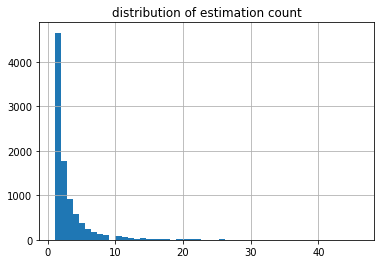

In [88]:
#the distribution of the estimation count per accounting period per stock
import matplotlib.pyplot as plt
df_forecast.groupby(['ticker','ern_date','quarternum']).count()[['analyst_ern_forecast']].hist(bins=50)
plt.title('distribution of estimation count')
plt.show()

For erning period with only 1 estimation, the measure of median/mean/skewness/kurtosis can't be normalized using standard deviation.

In [91]:
#analyst distribution
forecast_median=df_forecast.groupby(['ticker','ern_date','quarternum']).median()['analyst_ern_forecast']
forecast_mean=df_forecast.groupby(['ticker','ern_date','quarternum']).mean()['analyst_ern_forecast']
forecast_skew=forecast_median-forecast_mean
#use Q3-Q1 as an alternative measure of kurtosis
forecast_kurtosis=df_forecast.groupby(['ticker','ern_date','quarternum']).quantile(0.75)['analyst_ern_forecast']-df_forecast.groupby(['ticker','ern_date','quarternum']).quantile(0.25)['analyst_ern_forecast']
forecast_std=df_forecast.groupby(['ticker','ern_date','quarternum']).std()['analyst_ern_forecast']

In [136]:
#merge the actual with the analyst distribution
df_actual['median_surprise']=forecast_median-df_actual['actual_ern_value']
df_actual['mean_surprise']=forecast_mean-df_actual['actual_ern_value']
df_actual['forecast_skew']=forecast_skew
df_actual['forecast_kurt']=forecast_kurtosis
df_actual['forecast_std']=forecast_std

In [144]:
#this is before normalization
df_actual.head()

actual_ern_value  actual_date  median_surprise  \
ticker ern_date quarternum                                                   
A      19881231 4                       0.07     19890401              NaN   
       19890331 1                       0.00     19890517              NaN   
       19890630 2                      -0.09     19890816              NaN   
       19890930 3                       0.00     19891114              NaN   
       19891231 4                       0.00     19900418              NaN   

                            mean_surprise  forecast_skew  forecast_kurt  \
ticker ern_date quarternum                                                
A      19881231 4                     NaN            NaN            NaN   
       19890331 1                     NaN            NaN            NaN   
       19890630 2                     NaN            NaN            NaN   
       19890930 3                     NaN            NaN            NaN   
       19891231 4                     NaN            NaN            NaN   

                            forecast_std  
ticker ern_date quarternum                
A      19881231 4                    NaN  
       19890331 1                    NaN  
       19890630 2                    NaN  
       19890930 3                    NaN  
       19891231 4                    NaN

To normalize those measure of forecast distribution, I first look at the count of forecast per quarter per stock.

For erning period with only 1 estimation, the measure of median/mean/skewness/kurtosis can't be normalized using standard deviation.

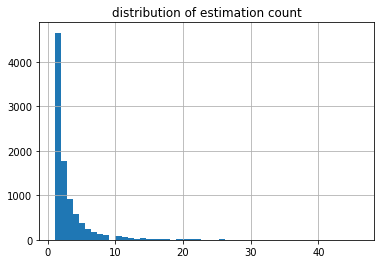

In [143]:
#the distribution of the estimation count per accounting period per stock
import matplotlib.pyplot as plt
df_forecast.groupby(['ticker','ern_date','quarternum']).count()[['analyst_ern_forecast']].hist(bins=50)
plt.title('distribution of estimation count')
plt.show()